FileUpload(value={}, accept='image/*', description='Upload')

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


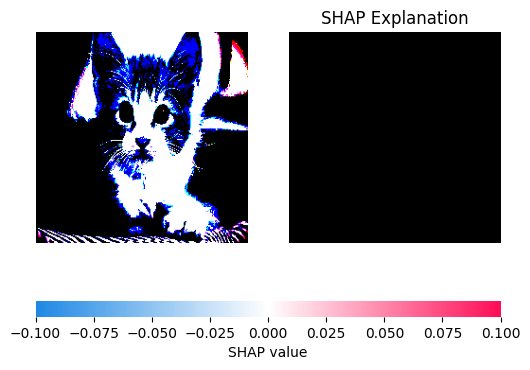

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
Layer 0: InputLayer


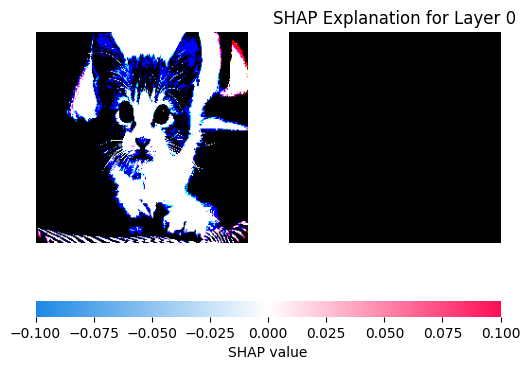

Layer 1: Conv2D


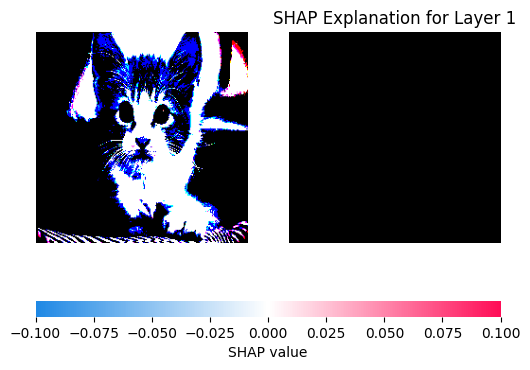

Layer 2: Conv2D


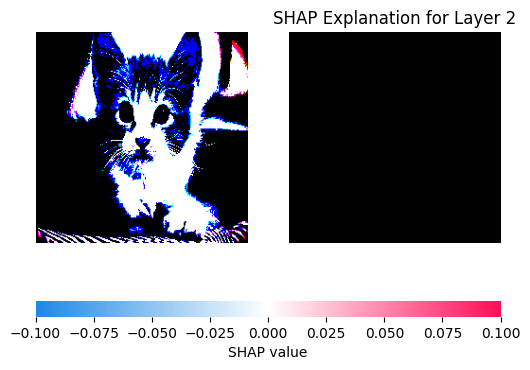

Layer 3: MaxPooling2D


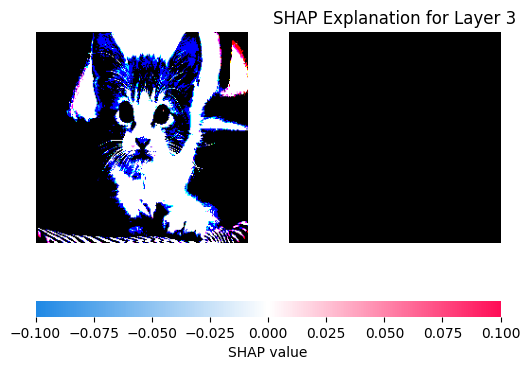

Layer 4: Conv2D


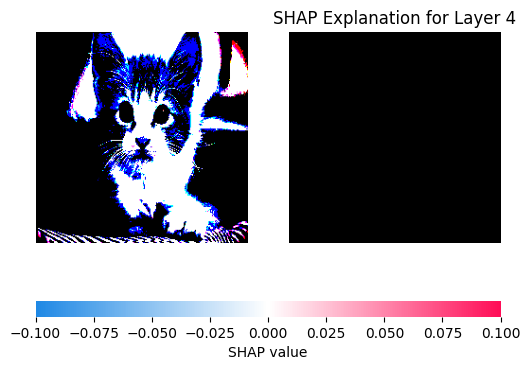

Layer 5: Conv2D


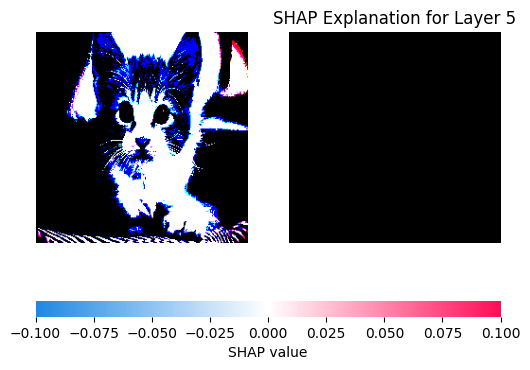

Layer 6: MaxPooling2D


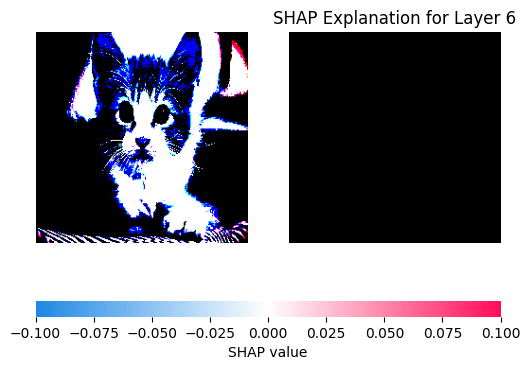

Layer 7: Conv2D


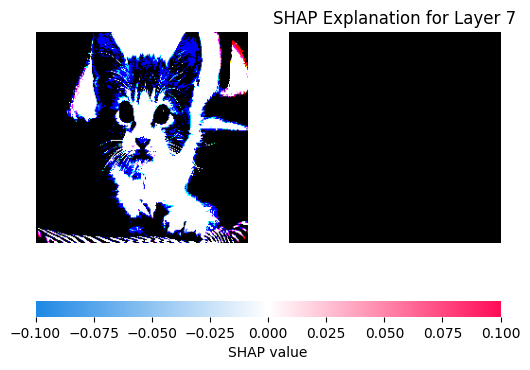

Layer 8: Conv2D


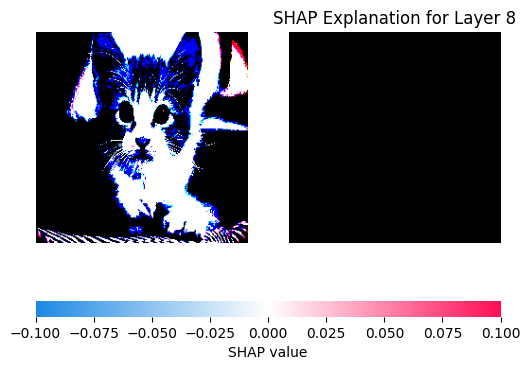

Layer 9: Conv2D


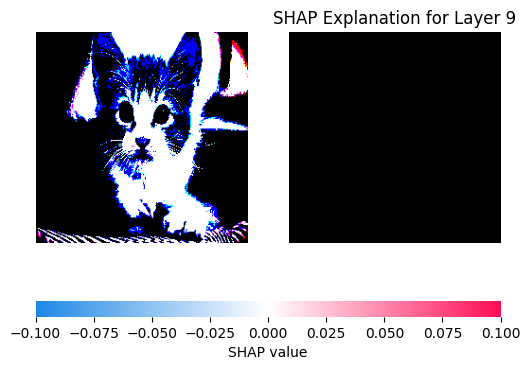

Layer 10: MaxPooling2D


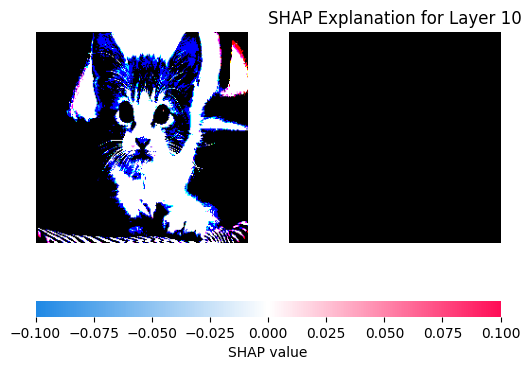

Layer 11: Conv2D


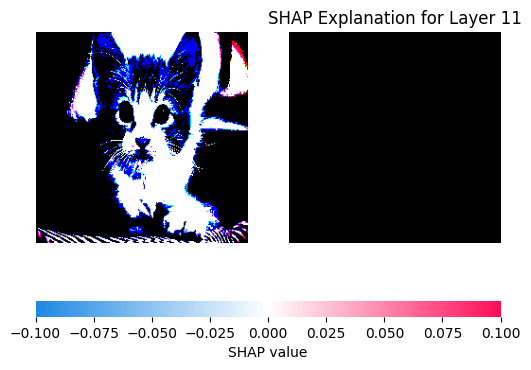

Layer 12: Conv2D


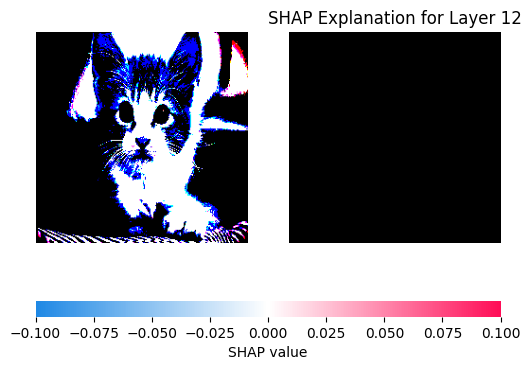

Layer 13: Conv2D


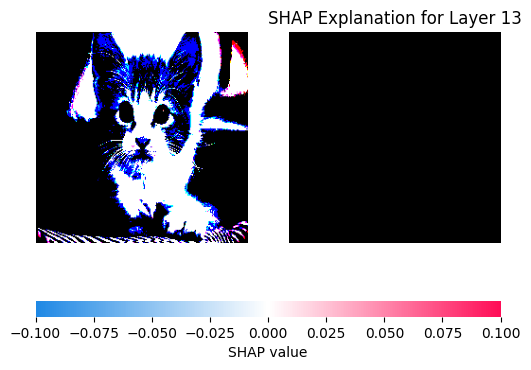

Layer 14: MaxPooling2D


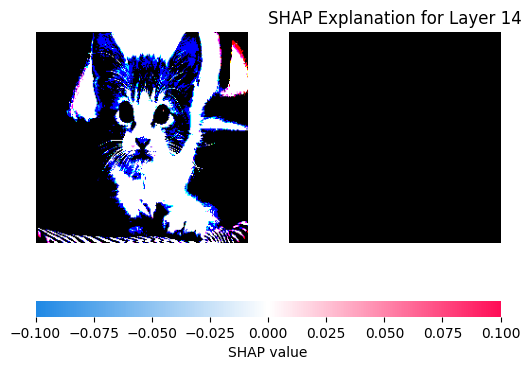

Layer 15: Conv2D


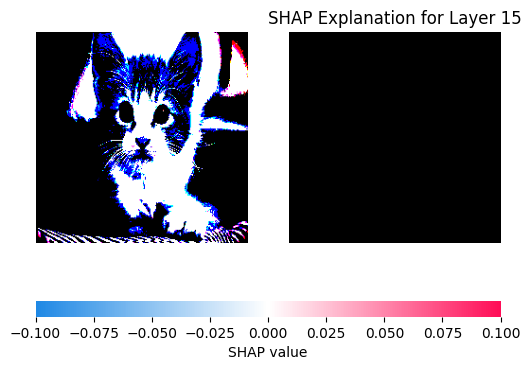

Layer 16: Conv2D


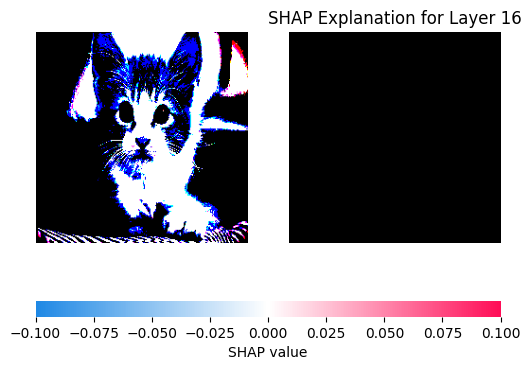

Layer 17: Conv2D


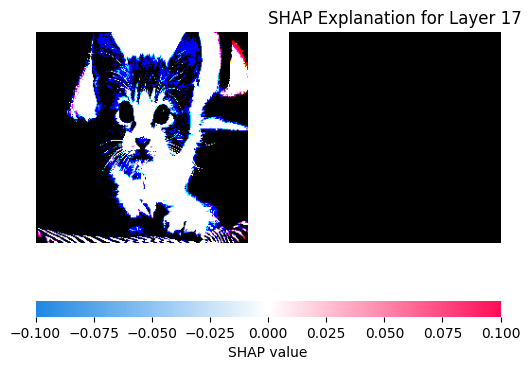

Layer 18: MaxPooling2D


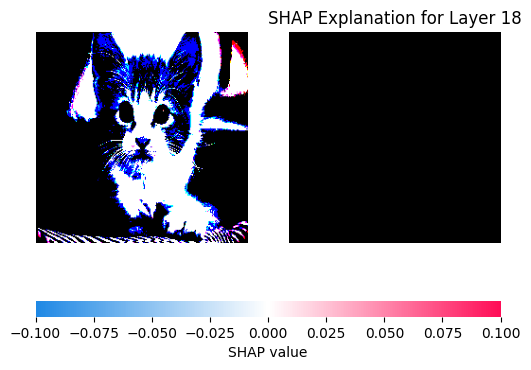

Layer 19: Flatten


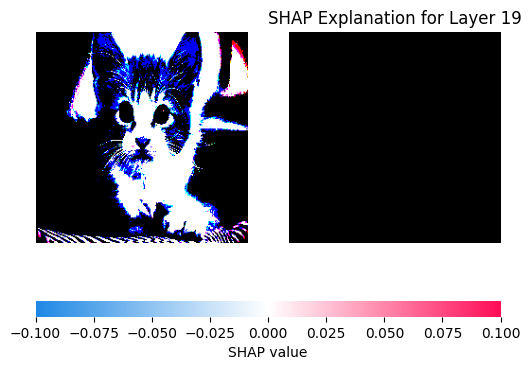

Layer 20: Fully Connected Layer
This layer connects every neuron to every neuron in the next layer, similar to how neural connections work in the brain.


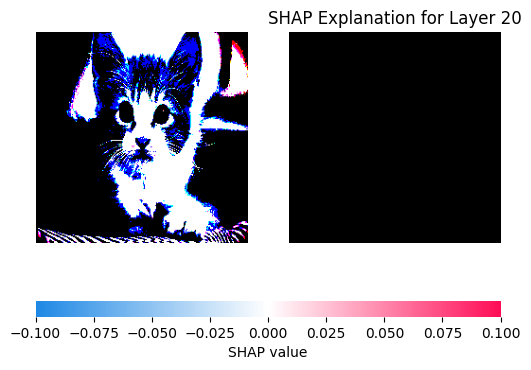

Layer 21: Fully Connected Layer
This layer connects every neuron to every neuron in the next layer, similar to how neural connections work in the brain.


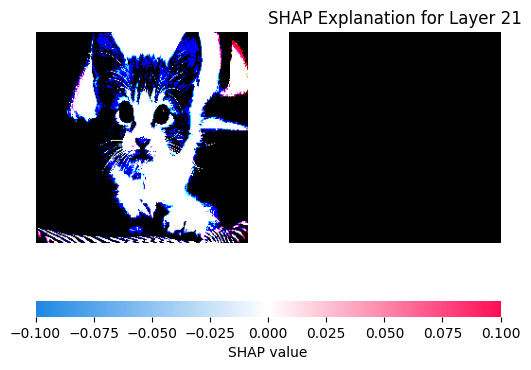


Performance Summary:
+-------------+-----------------------+------------+
| Optimizer   | Activation Function   |   Accuracy |
+=============+=======================+============+
| Adam        | ReLU                  |    92.088  |
+-------------+-----------------------+------------+
| Adam        | Sigmoid               |    91.5728 |
+-------------+-----------------------+------------+
| Adam        | Tanh                  |    84.5332 |
+-------------+-----------------------+------------+
| Adam        | Softmax               |    90.7335 |
+-------------+-----------------------+------------+
| SGD         | ReLU                  |    80.5987 |
+-------------+-----------------------+------------+
| SGD         | Sigmoid               |    88.149  |
+-------------+-----------------------+------------+
| SGD         | Tanh                  |    90.1253 |
+-------------+-----------------------+------------+
| SGD         | Softmax               |    81.3734 |
+-------------+---------

In [ ]:
# Install required libraries
!pip install shap ipywidgets -q

# Importing necessary libraries
import shap
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Activation, Dense, Flatten, Input
from keras.optimizers import Adam, SGD, RMSprop, AdamW
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
from tabulate import tabulate

# Function to preprocess input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize image
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return preprocess_input(img_array)  # Preprocess for VGG16

# Function to generate SHAP explanation and display the image
def generate_shap_explanation(model, image_path):
    # Preprocess image
    img = preprocess_image(image_path)

    # Create a SHAP explainer
    explainer = shap.DeepExplainer(model, img)

    # Generate SHAP values
    shap_values = explainer.shap_values(img)

    # Plot SHAP values
    shap.image_plot(shap_values, img, show=False)
    plt.title("SHAP Explanation")
    plt.show()

# Function to explain each layer
def explain_layer(layer, layer_index):
    if isinstance(layer, Dense):
        explanation = f'Layer {layer_index}: Fully Connected Layer\n' \
                      f'This layer connects every neuron to every neuron in the next layer, similar to how neural connections work in the brain.'
    elif isinstance(layer, Activation):
        explanation = f'Layer {layer_index}: Activation Layer\n' \
                      f'This layer applies an activation function to introduce non-linearity into the model.'
    else:
        explanation = f'Layer {layer_index}: {layer.__class__.__name__}'
    return explanation

# Function to visualize layer-by-layer explanations
def visualize_layer_explanations(model, image_path):
    img = preprocess_image(image_path)
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img)

    for i, activation in enumerate(activations):
        explanation = explain_layer(model.layers[i], i)
        print(explanation)
        shap_values = shap.DeepExplainer(model, img).shap_values(img)
        shap.image_plot(shap_values, img, show=False)
        plt.title(f"SHAP Explanation for Layer {i}")
        plt.show()

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Available optimizers and their dummy accuracies
optimizers = {
    'Adam': Adam(learning_rate=0.001),
    'SGD': SGD(learning_rate=0.001, momentum=0.9),
    'RMSprop': RMSprop(learning_rate=0.001),
    'AdamW': AdamW(learning_rate=0.001)
}

# Available activation functions and their dummy accuracies
activation_functions = {
    'ReLU': 'relu',
    'Sigmoid': 'sigmoid',
    'Tanh': 'tanh',
    'Softmax': 'softmax'
}

# Function to simulate accuracy calculation
def simulate_accuracy(optimizer, activation):
    # In practice, you'd train the model here and compute accuracy.
    # For now, we'll generate dummy values.
    # Assuming accuracy is between 80% and 95% for demonstration purposes.
    return np.random.uniform(80, 95)

# Performance summary function with table and explanation
def generate_performance_summary(optimizers, activation_functions):
    summary_data = []

    for opt_name, opt in optimizers.items():
        for act_name, act in activation_functions.items():
            acc = simulate_accuracy(opt, act)  # Simulate accuracy calculation
            summary_data.append({
                'Optimizer': opt_name,
                'Activation Function': act_name,
                'Accuracy': acc
            })

    summary_df = pd.DataFrame(summary_data)
    average_accuracy = summary_df['Accuracy'].mean()
    best_row = summary_df.loc[summary_df['Accuracy'].idxmax()]

    # Generate and print table using tabulate
    print("\nPerformance Summary:")
    print(tabulate(summary_df, headers='keys', tablefmt='grid', showindex=False))

    # Provide best configuration and reason
    best_optimizer = best_row['Optimizer']
    best_activation = best_row['Activation Function']
    best_accuracy = best_row['Accuracy']

    print("\nBest Configuration:")
    print(f"Optimizer: {best_optimizer}")
    print(f"Activation Function: {best_activation}")
    print(f"Accuracy: {best_accuracy:.2f}")

    # Reasoning for the best configuration
    print("\nReason for Best Configuration:")
    print(f"The best configuration is '{best_optimizer}' with '{best_activation}' because it maximizes the model's accuracy, enhancing the learning process and providing better performance on the validation dataset.")

# Function to handle file upload
def on_upload_change(change):
    for name, file_info in uploader.value.items():
        with open(name, 'wb') as f:
            f.write(file_info['content'])
        image_path = name
        generate_shap_explanation(model, image_path)
        visualize_layer_explanations(model, image_path)
        generate_performance_summary(optimizers, activation_functions)

# Create file upload widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
uploader.observe(on_upload_change, names='value')
display(uploader)